In [1]:
%pylab inline
%matplotlib inline
!pip install git+https://github.com/jakevdp/JSAnimation.git

Populating the interactive namespace from numpy and matplotlib
  Cloning https://github.com/jakevdp/JSAnimation.git to /tmp/pip-req-build-s4ghu6zm
  Running command git clone -q https://github.com/jakevdp/JSAnimation.git /tmp/pip-req-build-s4ghu6zm
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=12295 sha256=ccc370370ca50d0b9552f740d9286779909ba59e77cee31698bc91a81a83c4e9
  Stored in directory: /tmp/pip-ephem-wheel-cache-5j1dpuhb/wheels/2e/69/c1/62e849a90a158df5c1d33ed530e381a74589f2be56d699c156
Successfully built JSAnimation


In [2]:
# Perfect sensor
def sense(x):
    return x

In [3]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [4]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    # 'y': actual position of robot

    ux = -1 * sin(t) * (sin(5* t) + 2) + 5*cos(5*t) * cos(t)
    uy = cos(t) * (sin(5*t) + 2) + 5*cos(5*t) * sin(t)
    
    return array([ux, uy])

In [5]:
tf = 8.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([1.8, 0.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u + [0,.1])
    x_log.append(copy(x))
    
x_log = array(x_log)

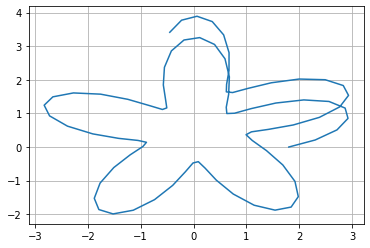

In [6]:
grid()
plot(x_log[:,0], x_log[:,1])

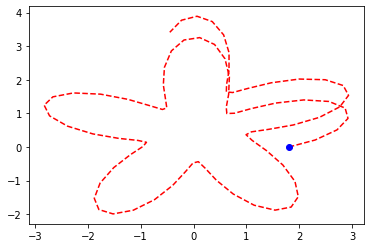

In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())